<a href="https://colab.research.google.com/github/CGnal/agos-ai-course/blob/master/2_2_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/CGnal/agos-ai-course/blob/master/2_2_mlp.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Install tensorflow

In [1]:
!pip install tensorflow==2.6.2

In [2]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-raa59xhz
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-raa59xhz


# Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
tf.__version__

'2.6.2'

In [5]:
%load_ext tensorboard
import tensorboard
tensorboard.__version__

'2.6.0'

In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Multi-Layer Fully Connected Networks

1. Simply a stack of fully connected layers. 
2. Each fully connected layer is also called a Dense layer and is composed of multiple perceptron units.
3. Each node in the image below is a perceptron


![picture](https://drive.google.com/uc?id=1Eyg4RhUnkaEMsX-eTs6c2REZDPH-4tGS)


## Create a simple feed forward neural network

In [7]:
# Define Sequential model with 2 layers
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu", name="layer1", input_shape=(10, 3)),
        layers.Dense(2, name="layer2"),
    ]
)

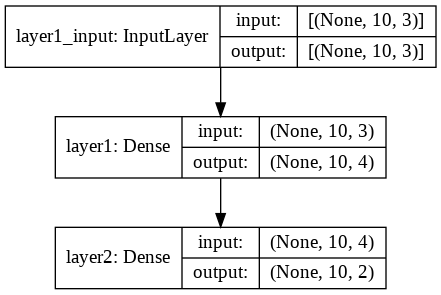

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10, 4)             16        
_________________________________________________________________
layer2 (Dense)               (None, 10, 2)             10        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.weights

[<tf.Variable 'layer1/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[ 0.47886395, -0.3552636 ,  0.8476213 , -0.68822515],
        [ 0.68359995,  0.19632435, -0.35305494,  0.17233646],
        [-0.7714622 ,  0.01736617,  0.04174274, -0.11111444]],
       dtype=float32)>,
 <tf.Variable 'layer1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'layer2/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[-0.17009354,  0.03043699],
        [ 0.40696406,  0.6147933 ],
        [-0.668802  , -0.20915508],
        [ 0.23159885,  0.23706222]], dtype=float32)>,
 <tf.Variable 'layer2/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [11]:
# Call model on a test input
x = tf.random.uniform((10, 3)) #10 samples 3 features 
y = model(x)

In [12]:
x

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0.07240963, 0.44069088, 0.8992747 ],
       [0.55212605, 0.29388905, 0.94011605],
       [0.46741533, 0.70978343, 0.20146036],
       [0.9728737 , 0.40885532, 0.4580115 ],
       [0.6064551 , 0.04729724, 0.42184818],
       [0.57608366, 0.73255396, 0.03594005],
       [0.49498415, 0.92366135, 0.37955034],
       [0.13733733, 0.8144232 , 0.4617746 ],
       [0.01910961, 0.83997846, 0.6995927 ],
       [0.67592716, 0.6618178 , 0.27272415]], dtype=float32)>

In [13]:
y

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.03109645,  0.04697685],
       [-0.2698468 , -0.08438944],
       [-0.19716768, -0.01536115],
       [-0.53444093, -0.13435061],
       [-0.34440285, -0.10770543],
       [-0.28199175, -0.02555556],
       [-0.16609605,  0.00208602],
       [ 0.00318754,  0.08133809],
       [ 0.07434522,  0.11877964],
       [-0.33074158, -0.05612339]], dtype=float32)>

## keras.Sequential and model object
* `model`: model is core data structure of keras. It holds the stack of layers created for the model. 

* `keras.Sequential`: creates model object. Provides functions to fit the model and do predict on the model.


# Sample problem : Fashion Mnist

Train a neural network model to classify images of clothing, like sneakers and shirts.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:



In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
Image shape : 60,000 x 28 x 28

Each image is represented as a 2 dimensional matrix of 28 x 28

In [16]:
train_images.shape,len(train_labels)


((60000, 28, 28), 60000)

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

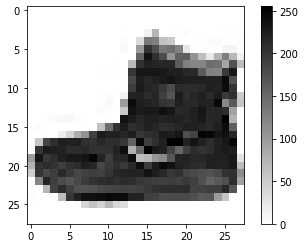

In [19]:
plt.imshow(train_images[0], plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess images
Normalize pixel values in the range [0, 1], i.e. divide by 255.

In [20]:
# important to perform each processing step separately on train and test 

train_images = train_images / 255.0

test_images = test_images / 255.0

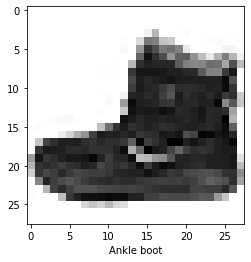

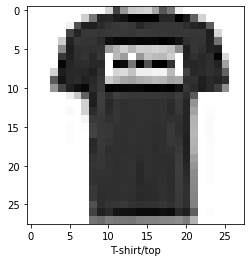

In [21]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0]])
plt.show()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])
plt.show()


## Build the model and pipeline using Sequential API

## Setup layers

Flatten -> Dense(128) -> Dense(10) 

Flatten : flatten images i.e. convert 28,28 to 28*28=784 vector

Dense(250): Hidden layer with 250 units

Dense(10): Dense layer with 10 outputs each corresponding to our class label

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model

Compiling the model means setting up the optimizer and loss function

* **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
* **Metrics** —Used to monitor the training and testing steps. This example uses accuracy, the fraction of the images that are correctly classified.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               196250    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


Categorical cross entropy : Use when class labels are one hot encoded

Sparse categorical cross entropy : Use when class labels are integers

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [24]:
# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_images, train_labels, epochs=100, batch_size=1000, shuffle=True, callbacks=[tensorboard_callback], validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 2s 27ms/step - loss: 0.8369 - accuracy: 0.7225 - val_loss: 0.5448 - val_accuracy: 0.8151
Epoch 2/100
48/48 [==============================] - 1s 23ms/step - loss: 0.4970 - accuracy: 0.8326 - val_loss: 0.4725 - val_accuracy: 0.8376
Epoch 3/100
48/48 [==============================] - 1s 23ms/step - loss: 0.4416 - accuracy: 0.8496 - val_loss: 0.4299 - val_accuracy: 0.8522
Epoch 4/100
48/48 [==============================] - 1s 23ms/step - loss: 0.4100 - accuracy: 0.8586 - val_loss: 0.4141 - val_accuracy: 0.8567
Epoch 5/100
48/48 [==============================] - 1s 23ms/step - loss: 0.3911 - accuracy: 0.8648 - val_loss: 0.3988 - val_accuracy: 0.8614
Epoch 6/100
48/48 [==============================] - 1s 22ms/step - loss: 0.3752 - accuracy: 0.8704 - val_loss: 0.3860 - val_accuracy: 0.8648
Epoch 7/100
48/48 [==============================] - 1s 22ms/step - loss: 0.3534 - accuracy: 0.8772 - val_loss: 0.3747 - val_accuracy: 0.8688
Epoch 

## Evaluate the model on test set

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3866 - accuracy: 0.8901

Test accuracy: 0.8901000022888184


## Visual check

Correct labels : blue 

Incorrect labels : red

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

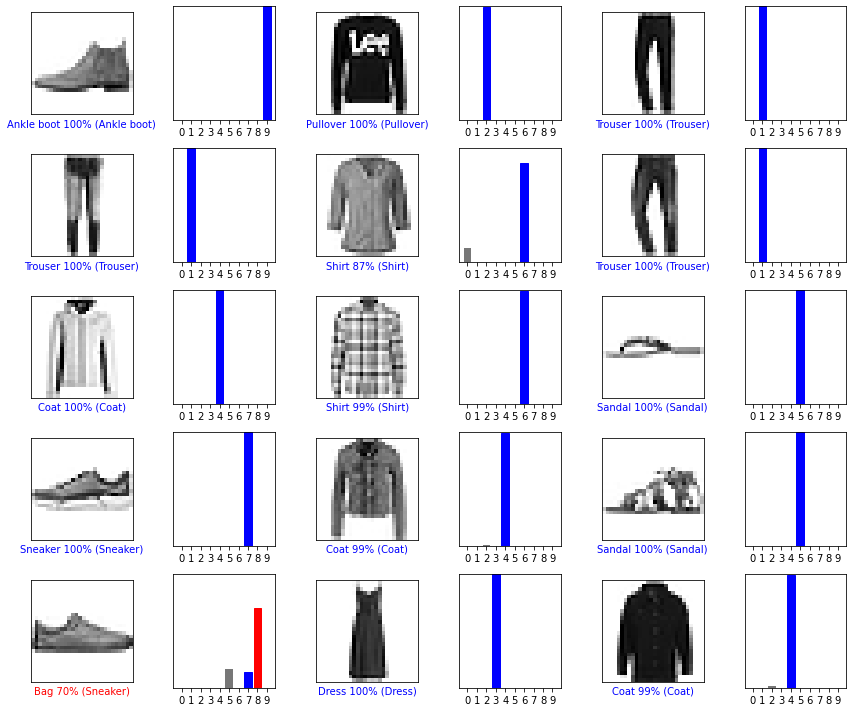

In [27]:
predictions = model.predict(test_images)
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Overfitting? 

As a neural network gets deeper the tendency to overfit increases. How to debug if our model is overfitting? 


Does the validation loss rise after some epochs? And if validation loss is higher than the training loss its perfectly fine, your model is still learning. Naturally you can't have validation loss to be less than your training loss (it does become very close to your training loss if the model is deep enough ). But if validation loss rises and your training loss keeps decreasing then you are overfitting. Use early stopping to tackle overfitting.

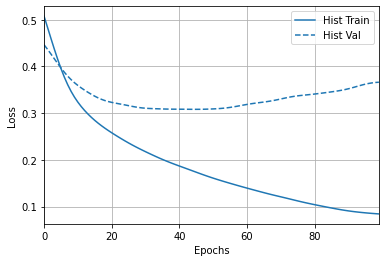

In [28]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})

### Early stopping

Stop training when validation loss does not improve any longer.

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)



history = model.fit(train_images, train_labels, batch_size=1000, 
          epochs=100, callbacks=[earlystopping, tensorboard_callback], validation_split=0.2)

# train_images = 48k (20% for validation)

Epoch 1/100
48/48 [==============================] - 2s 27ms/step - loss: 0.7969 - accuracy: 0.7320 - val_loss: 0.5379 - val_accuracy: 0.8138
Epoch 2/100
48/48 [==============================] - 1s 23ms/step - loss: 0.4908 - accuracy: 0.8336 - val_loss: 0.4798 - val_accuracy: 0.8306
Epoch 3/100
48/48 [==============================] - 1s 23ms/step - loss: 0.4423 - accuracy: 0.8493 - val_loss: 0.4315 - val_accuracy: 0.8506
Epoch 4/100
48/48 [==============================] - 1s 23ms/step - loss: 0.4110 - accuracy: 0.8577 - val_loss: 0.4200 - val_accuracy: 0.8530
Epoch 5/100
48/48 [==============================] - 1s 23ms/step - loss: 0.3873 - accuracy: 0.8660 - val_loss: 0.3979 - val_accuracy: 0.8626
Epoch 6/100
48/48 [==============================] - 1s 23ms/step - loss: 0.3729 - accuracy: 0.8703 - val_loss: 0.3935 - val_accuracy: 0.8642
Epoch 7/100
48/48 [==============================] - 1s 23ms/step - loss: 0.3597 - accuracy: 0.8743 - val_loss: 0.3736 - val_accuracy: 0.8707
Epoch 

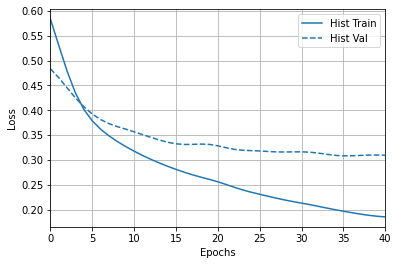

In [30]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3300 - accuracy: 0.8894

Test accuracy: 0.8894000053405762


### Dropout

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)



history = model.fit(train_images, train_labels, batch_size=1000, 
          epochs=100, callbacks=[earlystopping, tensorboard_callback], validation_split=0.2)

# train_images = 48k (20% for validation)

Epoch 1/100
48/48 [==============================] - 2s 28ms/step - loss: 0.8763 - accuracy: 0.6992 - val_loss: 0.5561 - val_accuracy: 0.8151
Epoch 2/100
48/48 [==============================] - 1s 26ms/step - loss: 0.5363 - accuracy: 0.8170 - val_loss: 0.4677 - val_accuracy: 0.8399
Epoch 3/100
48/48 [==============================] - 1s 26ms/step - loss: 0.4683 - accuracy: 0.8394 - val_loss: 0.4339 - val_accuracy: 0.8474
Epoch 4/100
48/48 [==============================] - 1s 25ms/step - loss: 0.4325 - accuracy: 0.8511 - val_loss: 0.4131 - val_accuracy: 0.8558
Epoch 5/100
48/48 [==============================] - 1s 25ms/step - loss: 0.4074 - accuracy: 0.8572 - val_loss: 0.3868 - val_accuracy: 0.8619
Epoch 6/100
48/48 [==============================] - 1s 26ms/step - loss: 0.3856 - accuracy: 0.8649 - val_loss: 0.3770 - val_accuracy: 0.8667
Epoch 7/100
48/48 [==============================] - 1s 26ms/step - loss: 0.3718 - accuracy: 0.8689 - val_loss: 0.3764 - val_accuracy: 0.8633
Epoch 

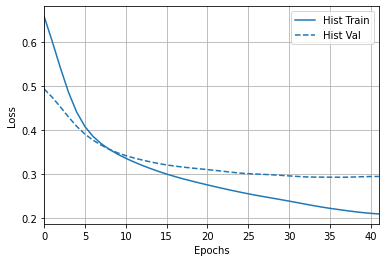

In [33]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})